# Table of Contents
1. Importing Libraries
2. Importing Files
3. Bar Charts
4. Creating Histogram
5. Scatter Plot
6. Recreating Histogram
7. Creating a Line Chart
8. Exporting Line Chart

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Files

In [2]:
# setting Path
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Data Analytics Immersion/Achievement 4/04-04-2024 Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_aggregated.pkl'))

## 03. Bar Charts

<Axes: xlabel='orders_day_of_week'>

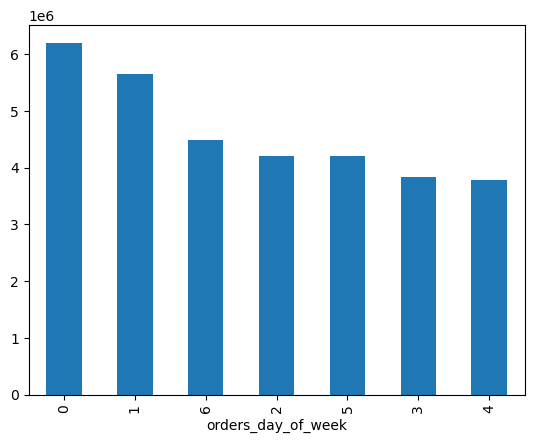

In [4]:
# Plotting bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

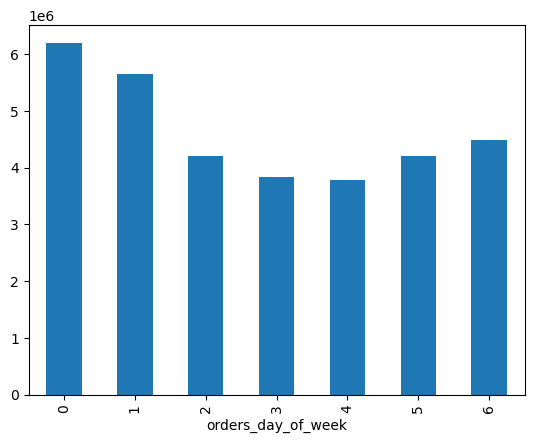

In [5]:
# sorting index
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

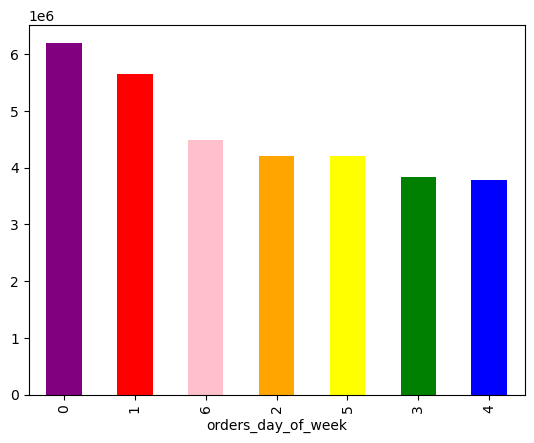

In [6]:
# Saving bar chart to export
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
# Exporting figure
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## 04. Creating Histogram

<Axes: ylabel='Frequency'>

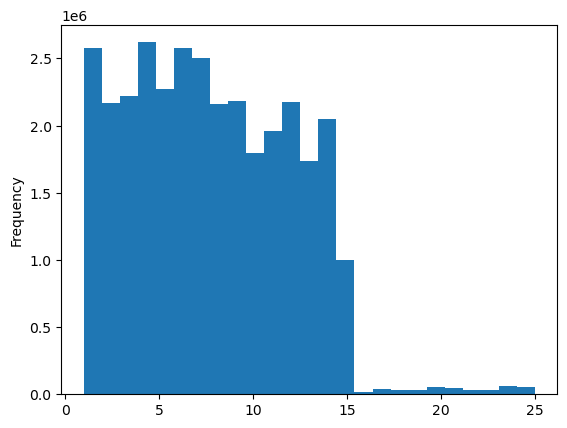

In [8]:
# Plotting histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

## 05. Scatter Plot

<Axes: xlabel='prices', ylabel='prices'>

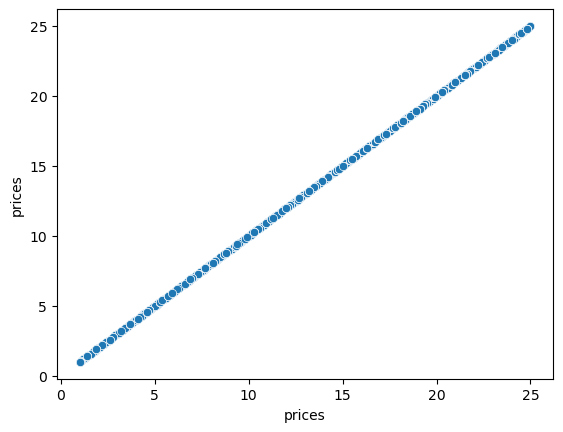

In [9]:
## Creating a scatterplot to explore the outlier
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [10]:
## Finding outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]['prices']

Series([], Name: prices, dtype: float64)

In [11]:
## Converting outleirs as missing values
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [12]:
# Checking Replacements
ords_prods_merge['prices'].max()

25.0

## 06. Replotting Histogram

<Axes: ylabel='Frequency'>

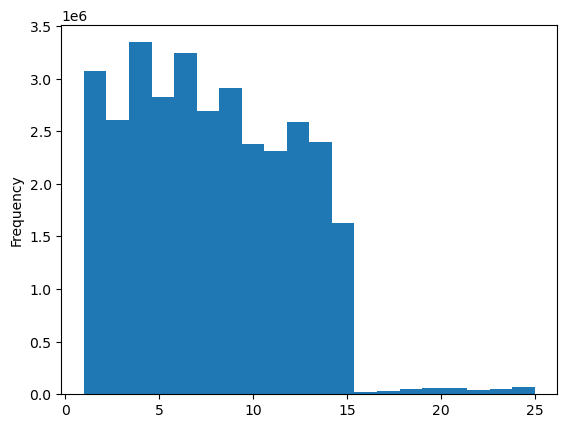

In [13]:
# Replotting Histogram
ords_prods_merge['prices'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

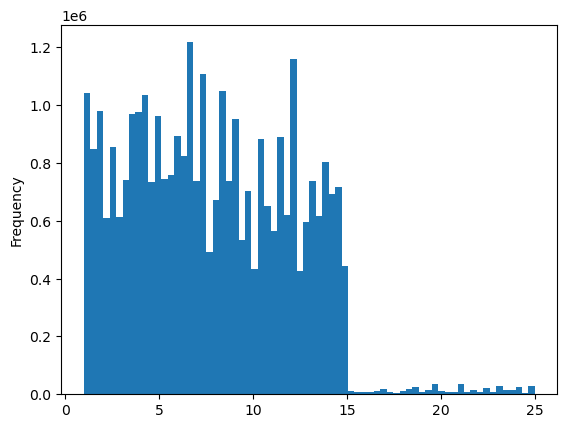

In [14]:
# Increasing bin sizes to increase granularity
ords_prods_merge['prices'].plot.hist(bins=70)

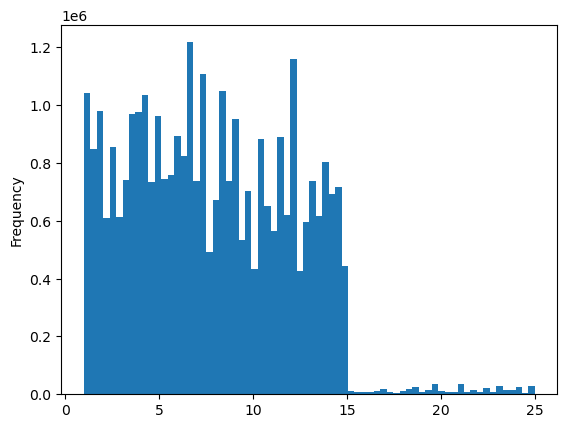

In [15]:
# Exporting Histogram
hist = ords_prods_merge['prices'].plot.hist(bins=70)

In [16]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_histogram.png'))

## 07. Creating a Line Chart

In [17]:
# Creating a subset of the dataframe
df = ords_prods_merge[:2000000]

In [18]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [19]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [20]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [21]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [22]:
len(big) + len(small)

32404859

In [23]:
df_2 = small[['orders_day_of_week','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


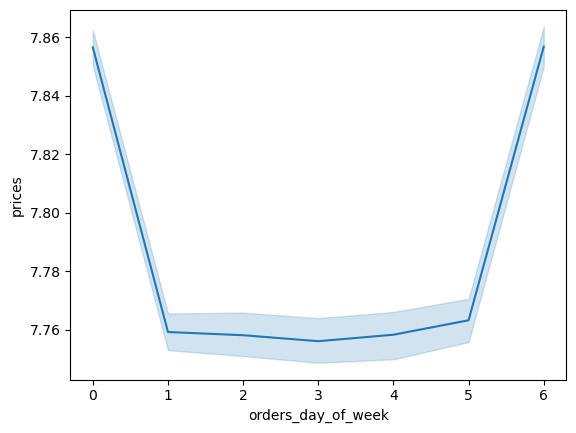

In [24]:
# Creating the line plot
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## 08. Exporting Line Chart

In [37]:
## Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_day_of_week_line_chart.png'))